In [156]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from matplotlib.colors import LogNorm, Normalize

plt.rcParams.update({'text.color' : "white",
                     'axes.labelcolor' : "white",
                     "ytick.color" : "w",
                     "xtick.color" : "w",
                     "axes.labelcolor" : "w",
                     "axes.edgecolor" : "w",
                     'axes.facecolor' : '#37474F'})

In [157]:
def speedPlot():
    bins = np.arange(0, 1.8, 0.05) #setting up the bins in graph
    i=0
    for df in dfs:
        speed_str = df["speed"] #extracting speed
        speed = speed_str.astype(np.float) #converting from string to float
        plt.hist(speed, histtype='stepfilled', alpha=0.5,bins=bins, color=colors[i], label=_labels[i])
        i=i+1

    plt.xlabel('Speed')
    plt.ylabel('Frequency')
    plt.title('Steps at speed')
    plt.yscale("log")
    plt.legend(loc="upper right")
    plt.show()

In [158]:
def timePlot():
    i=0
    datas = []
    datas_no_outliers = []
    for df in dfs:
        time_str = df["time"] #extracting time
        time = time_str.astype(np.float) #convert from string to float
        timeArr = time.values
        out = []
        current = (timeArr[0])
        out.append(int(current))
        for el in timeArr:
            if el!=current:
                out.append(int(el))
                current = el
        datas.append(out)
        datas_no_outliers.append(removeOutliers(out,1))
        i=i+1
    c = "white"
    c2 = "#37474F"
    plt.boxplot(datas, labels=_labels, patch_artist=True,
            boxprops=dict(facecolor=c2, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )
    plt.xlabel('Data series')
    plt.ylabel('timesteps')
    plt.title('Time to finish env')
    plt.legend(loc="upper right")
    plt.show()

    plt.figure()

    plt.boxplot(datas_no_outliers, labels=_labels)
    plt.xlabel('Data series')
    plt.ylabel('timesteps')
    plt.title('Time to finish env no outliers')
    plt.legend(loc="upper right")
    plt.show()

In [159]:
def densityPlot(env_dimension):
    i=0
    for df in dfs:
    #for df in cut_dfs: #uncomment to cut the area to corridor only
        timestep_str = df["timestamp"] #extracting time
        time = timestep_str.astype(np.int) #converting from string to float
        timeArr = time.values

        count_arr = np.bincount(timeArr)
        for j in range(len(count_arr)-1,-1,-1):
            if(count_arr[j] == 0):
                count_arr[j] = count_arr[j+1]
        
        x = list(range(0,len(count_arr)))
        density = [number/(env_dimension[0]*env_dimension[1]) for number in count_arr]
        plt.plot(x,density, color=colors[i],label=_labels[i])
        i=i+1

    plt.xlabel('Timesteps')
    plt.ylabel('Agents/m^2')
    plt.title('Density through time')
    plt.legend(loc="upper right")
    plt.show()

In [160]:
def hitAgents():
    i=0
    datas = []
    datasNoOutliers = []
    for df in dfs:
        hits_str = df["hitAgents"] #extracting time
        hits = hits_str.astype(np.float) #convert from string to float
        hitsArr = hits.values
        out = []
        current = (hitsArr[0])
        out.append(int(current))
        for el in hitsArr:
            if el!=current:
                out.append(int(el))
                current = el
        datas.append(out)
        datasNoOutliers.append(removeOutliers(out,1))
        i=i+1

    c = "white"
    c2 = "#37474F"
    plt.boxplot(datas, labels=_labels, patch_artist=True,
            boxprops=dict(facecolor=c2, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )
    
    plt.xlabel('Data series')
    plt.ylabel('hits')
    plt.title('Hits with other agents')
    plt.legend(loc="upper right")
    plt.show()

    plt.figure()

    plt.boxplot(datasNoOutliers, labels=_labels)
    plt.xlabel('Data series')
    plt.ylabel('hits')
    plt.title('Hits with agents no outliers')
    plt.legend(loc="upper right")
    plt.show()
        

In [161]:
def hitWalls():
    i=0
    datas = []
    datasNoOutliers = []
    for df in dfs:
        hits_str = df["wallsHit"] #extracting time
        hits = hits_str.astype(np.float) #convert from string to float
        hitsArr = hits.values
        out = []
        current = (hitsArr[0])
        out.append(int(current))
        for el in hitsArr:
            if el!=current:
                out.append(int(el))
                current = el

        datas.append(out)
        datasNoOutliers.append(removeOutliers(out,1))
        i=i+1
    plt.boxplot(datas, labels=_labels)
    plt.xlabel('Data series')
    plt.ylabel('hits')
    plt.title('Hits with walls')
    plt.legend(loc="upper right")
    plt.show()

    plt.figure()

    plt.boxplot(datasNoOutliers, labels=_labels)
    plt.xlabel('Data series')
    plt.ylabel('hits')
    plt.title('Hits with walls no outliers')
    plt.legend(loc="upper right")
    plt.show()

In [162]:
def removeOutliers(list, _max_deviations):
    array = np.array(list)
    mean = np.mean(array)
    std = np.std(array)
    distance_from_mean = abs(array - mean)
    max_deviations = _max_deviations
    not_outlier = distance_from_mean < max_deviations * std
    no_outliers = array[not_outlier]
    return no_outliers

In [163]:
def heatmap(env_dimension, cap):
    i = 0

    for df in dfs:
        df['posX'] = pd.to_numeric(df['posX'])
        df['posZ'] = pd.to_numeric(df['posZ'])
        arX = df['posX'].to_numpy()
        arZ = df['posZ'].to_numpy()

        arX = (arX - np.min(arX))/np.ptp(arX)
        arZ = (arZ - np.min(arZ))/np.ptp(arZ)

        arX = arX * env_dimension[0] * 3
        arZ = arZ * env_dimension[1] * 3

        arX = arX.astype(int)
        arZ = arZ.astype(int)

        heatmap = np.zeros((env_dimension[0] * 3 + 1, env_dimension[1] * 3 + 1))
        print(heatmap.shape)
        for j in range (0, len(arX)):
            #print(arZ[j],"--",arX[j])
            heatmap[arZ[j]][arX[j]] = heatmap[arZ[j]][arX[j]] + 1

        heatmap_capped = heatmap

        for k in range (0, len(heatmap)-1):
            for j in range (0, len(heatmap)-1):
                if cap < heatmap_capped[k][j]:
                    heatmap_capped[k][j] = cap

        curr_heatmap2 = sns.heatmap(heatmap_capped)
        curr_heatmap2.invert_yaxis()
        plt.xticks([])
        plt.yticks([])
        _labels[i] = _labels[i].replace("(old)","")
        #plt.title("Heatmap " + _labels[i])
        plt.figure()

        i = i + 1
        

No handles with labels found to put in legend.


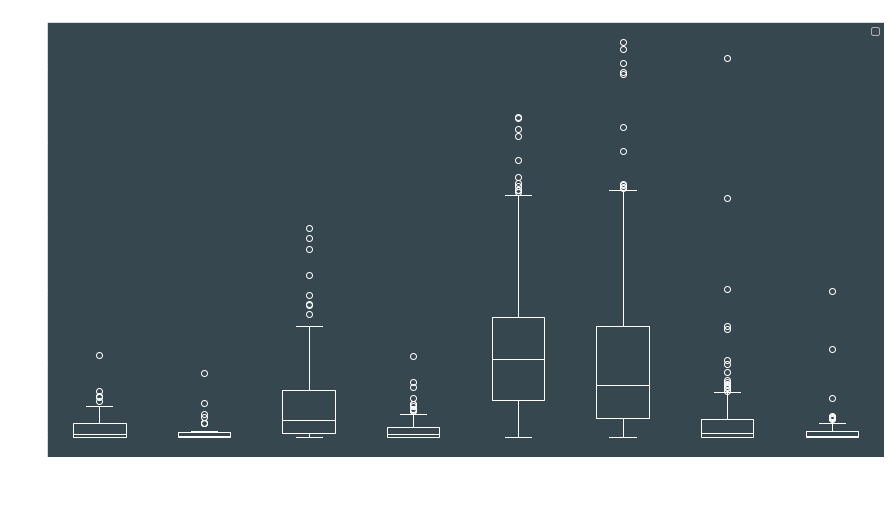

No handles with labels found to put in legend.


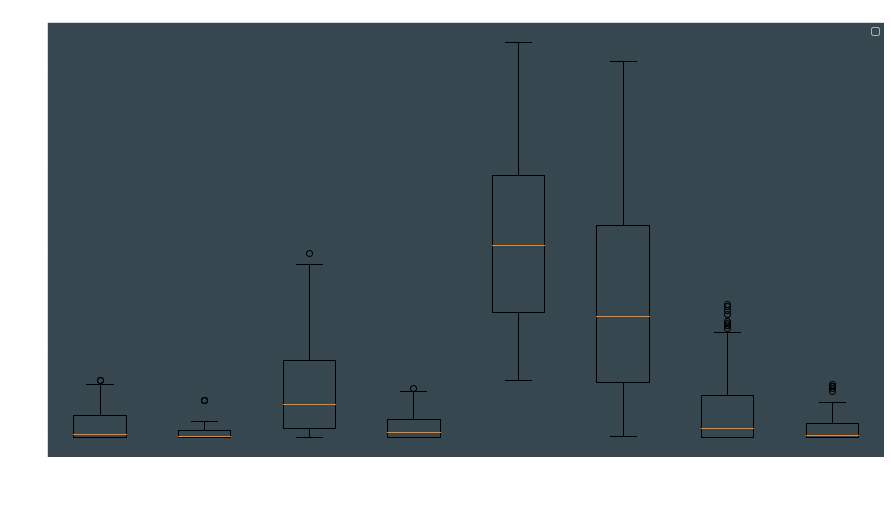

No handles with labels found to put in legend.


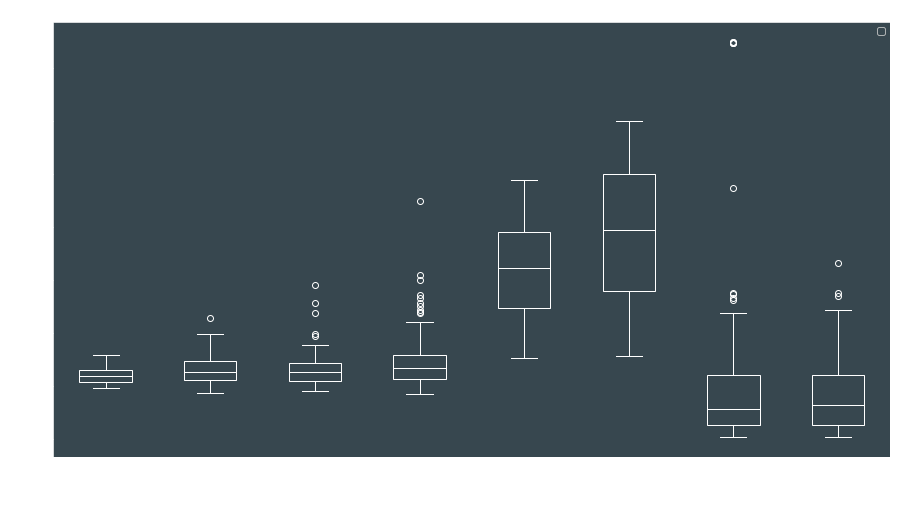

No handles with labels found to put in legend.


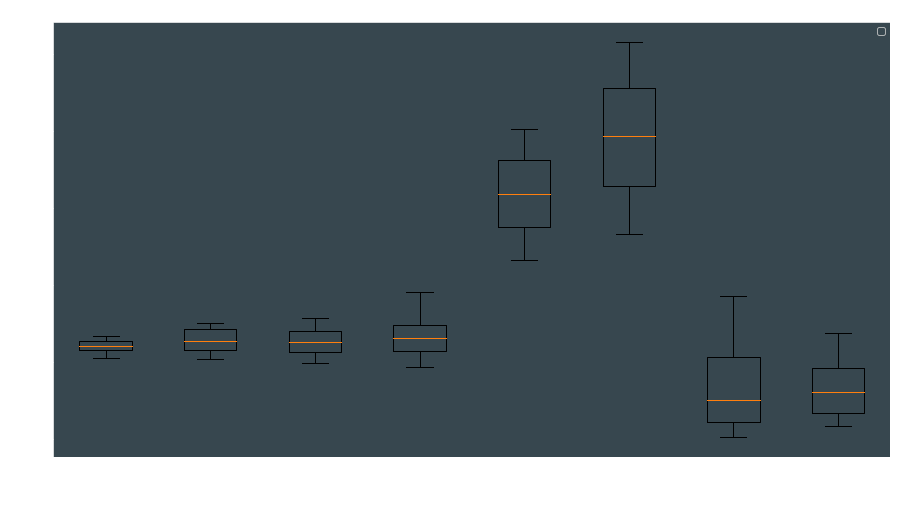

In [164]:
#comment all but one of this blocks to obtain the desired tuples composition and plots

#build the tuples for comparing different brains, same envs
envs = ["2ClassH", "4ClassH", "6ClassH", "2ClassHBIG", "4ClassHBIG", "6ClassHBIG"]
env_dimensions=[[30,30],[30,30],[30,30],[30,30],[30,30],[30,30]]
brains = ["base","new"]

"""
envs = ["STest","uncinata2","Labirinto", "incrocio4"]
env_dimensions=[[20,20],[20,20],[20,20],[20,20]]
brains = ["base","polite"]
"""

tuples = []
for env in envs:
    tupla = []
    for brain in brains:
        filename = "" + env + "(Clone)" + brain + ".txt"
        tupla.append(filename)
    tuples.append(tupla)
_labels = ["base", "mapoca"]

"""
#build the tuples for comparing different envs, same brain
tuples = []
brains = ["new"]
envs = ["2ClassH", "2ClassHBig", "4ClassH", "4ClassHBig","6ClassH", "6ClassHBig"]

brains = ["polite"]
envs = ["STest", "uncinata2", "incrocio4", "labirinto"]
envs = ["labirinto"]
#envs = ["6ClassH", "6ClassHBig"] 
#envs = ["2ClassHbig", "4ClassHBig", "6ClassHBig"] 
#envs = ["4ClassL", "4ClassM", "4ClassH"] 
#envs = ["6ClassL", "6ClassM", "6ClassH"]
env_dimensions=[[30,30],[30,30],[30,30]]
for brain in brains:
    tupla = []
    for env in envs:
        filename = "" + env + "(Clone)" + brain + ".txt"
        tupla.append(filename)
    tuples.append(tupla)
_labels = envs
"""


#build only one tuple for comparing all envs and brains pairings
envs = ["STest","uncinata2","Labirinto", "incrocio4"]
env_dimensions=[[20,20],[20,20],[20,20],[20,20],[40,20],[40,20],[20,20],[20,20]]
brains = ["base","polite"]

#envs = ["2ClassH", "4ClassH", "6ClassH", "2ClassHBIG", "4ClassHBIG", "6ClassHBIG"]
#env_dimensions=[[30,30],[30,30],[30,30],[30,30],[30,30],[30,30],[30,30],[30,30],[30,30],[30,30],[30,30],[30,30]]
#brains = ["base","polite"]
#brains = ["new"]

#envs = ["2ClassH(old)", "2ClassM", "2ClassL", "4ClassH(old)", "4ClassM", "4ClassL", "6ClassH(old)", "6ClassM", "6ClassL",]
#env_dimensions=[[30,30],[30,30],[30,30],[30,30],[30,30],[30,30],[30,30],[30,30],[30,30]]
#brains = ["base"]

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
tuples = []
_labels = []
tupla = []
for env in envs:
    for brain in brains:
        filename = "" + env + "(Clone)" + brain + ".txt"
        tupla.append(filename)
        if brain == "new" or brain == "polite":
            _labels.append("" + env + "\n mapoca")
        else:
            _labels.append("" + env + "\n base")
tuples.append(tupla)

areas_of_interest = [[-2.2,2.8,-14,13],[-2.2,2.8,-14,13],[-2.2,2.8,-14,13],[-2.2,2.8,-14,13],[-2.2,2.8,-14,13]]
colors=["red", "blue", "green", "yellow", "black"] #Bin color, must be enough for brains number

env_index = 0 
for tupla in tuples:
    env_dimension = env_dimensions[env_index]
    env_index = env_index + 1
    dfs = []
    cut_dfs = []
    n_agents = []
    for file in tupla:
        # for each log i save the dataframe
        df = pd.read_csv(f"../../LogTraining/AgentStats/{file}", decimal=",",
                            delimiter=";",
                            header=None, 
                            names=["posX", "posZ", "speed", "colore", "ID", "desiredSpe","timestamp", "time", "type", "hitAgents", "wallsHit"])      
        IDS = df["ID"] #extracting the agents ids
        n_agent = len(set(IDS)) # extracting unique ids

        n_agents.append(n_agent)
        #to extract data only from a section of the env
        #aoi = areas_of_interest[0]
        #df['posX'] = df['posX'].astype(float)
        #df['posZ'] = df['posZ'].astype(float)
        #new_df = df.loc[(df['posX']>aoi[0]) & (df['posX']<aoi[1]) & (df['posX']>aoi[2]) & (df['posX']<aoi[3])]
        #print("length before cut:", len(df), " len post cut: " , len(new_df))
        #cut_dfs.append(new_df)
        dfs.append(df)
        

    hitWalls()
    hitAgents()
    heatmap(env_dimension, 450)
    #speedPlot()
    timePlot()
    #densityPlot(env_dimension)
    
    